# SKLearn : Inspection

#### Explore the partial dependence (PD) of the response on a given feature
The PD of a feature (or a set of features) corresponds to the average response of an estimator for each possible value of the feature.

https://scikit-learn.org/stable/modules/generated/sklearn.inspection.partial_dependence.html

https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html

1. Example 1 :  Toy Data

2. Example 2 :  California Data

3. Example 3 :  IRIS Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib 
import matplotlib.pyplot as plt

In [3]:
from sklearn import tree 
from sklearn.inspection import partial_dependence

In [4]:
%matplotlib inline

## Example 1 : Toy Data

#### Regression

In [5]:
X = np.array([[0.0, 0.1, 2.1], [1.0, 0.5, 3.0], [2.0, 1.0, 3.5]])
y = np.array([0, 1, 2.5])

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
rgr = GradientBoostingRegressor(n_estimators=1, max_depth=1, random_state=None)
rgr.fit(X, y)

for i in range(3):
    pdep = partial_dependence(
        rgr, 
        X=X, 
        features=[i], 
        percentiles=(0,1),
        kind="average")
    
    print( pdep["average"][0] )

[0. 0. 0.]
[0. 0. 0.]
[-0.06666667 -0.06666667  0.13333333]


In [7]:
from sklearn.tree import DecisionTreeRegressor
rgr = DecisionTreeRegressor(max_depth=1, random_state=None)
rgr.fit(X, y)

for i in range(3):
    pdep = partial_dependence(
        rgr, 
        X=X, 
        features=[i], 
        percentiles=(0,1),
        kind="average")
    
    print( pdep )

{'average': array([[1.16666667, 1.16666667, 1.16666667]]), 'values': [array([0., 1., 2.])]}
{'average': array([[0.5, 0.5, 2.5]]), 'values': [array([0.1, 0.5, 1. ])]}
{'average': array([[1.16666667, 1.16666667, 1.16666667]]), 'values': [array([2.1, 3. , 3.5])]}


In [8]:
print( rgr.tree_.threshold )
print( rgr.tree_.feature )

[ 0.75 -2.   -2.  ]
[ 1 -2 -2]


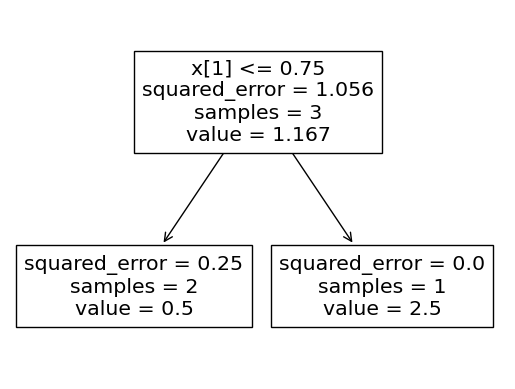

In [9]:
tree.plot_tree(rgr)
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
rgr = LinearRegression()
rgr.fit(X,y)

for i in range(3):
    pdep = partial_dependence(
        rgr, 
        X=X, 
        features=[i], 
        percentiles=(0,1),
        kind="average")
    
    print( pdep["average"][0] )

[-0.25268817  1.16666667  2.58602151]
[0.67741935 1.12903226 1.69354839]
[1.90860215 1.03763441 0.55376344]


In [11]:
def regression_average(model, X, cid):
    tmpx = np.arange(X.shape[0])
    cidx = np.where(tmpx != cid)[0]
    
    order_X = np.concatenate( ([cid],cidx) )
    
    mean_X = []
    for i in range(X.shape[1]):
        mean_X.append( np.mean(X[:,i]) )
    
    _X_ = np.array([ [x, mean_X[cidx[0]], mean_X[cidx[1]]] for x in X[:,cid] ])
    
    avg_val = []
    for i in range(3):
        val = model.intercept_ + np.sum(model.coef_[order_X] * _X_[i,:])
        avg_val.append(val)
    return {"average":[round(x,6) for x in avg_val],"values": X[:,cid]}

In [12]:
for i in range(3):
    print( regression_average(rgr, X, i) )

{'average': [-0.252688, 1.166667, 2.586022], 'values': array([0., 1., 2.])}
{'average': [0.677419, 1.129032, 1.693548], 'values': array([0.1, 0.5, 1. ])}
{'average': [1.908602, 1.037634, 0.553763], 'values': array([2.1, 3. , 3.5])}


#### Classification

In [13]:
X = np.array([[0.0,0.1,2.1], [1.0,0.5,3.0], [2.0,1.0,3.5]])
y = np.array([0,1,1])

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=1, max_depth=1, random_state=None)
clf.fit(X, y)

for i in range(3):
    pdep = partial_dependence(
        clf, 
        X=X, 
        features=[i], 
        percentiles=(0,1),
        kind="average")
    
    print( pdep["average"][0] )

[2.22044605e-17 2.22044605e-17 2.22044605e-17]
[-0.3   0.15  0.15]
[2.22044605e-17 2.22044605e-17 2.22044605e-17]


In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=1, random_state=None)
clf.fit(X,y)

for i in range(3):
    pdep = partial_dependence(
        clf, 
        X=X, 
        features=[i], 
        percentiles=(0,1),
        kind="average")
    
    print( pdep["average"][0] )

[0. 1. 1.]
[0.66666667 0.66666667 0.66666667]
[0.66666667 0.66666667 0.66666667]


In [16]:
print( clf.tree_.threshold )
print( clf.tree_.feature )

[ 0.5 -2.  -2. ]
[ 0 -2 -2]


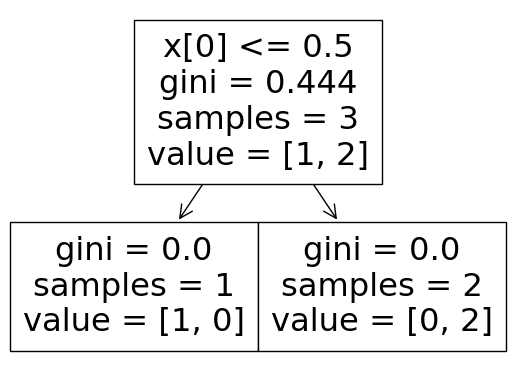

In [17]:
tree.plot_tree(clf)
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,y)

for i in range(3):
    pdep = partial_dependence(
        clf, 
        X=X, 
        features=[i], 
        percentiles=(0,1),
        kind="average")
    print( pdep )

{'average': array([[0.55395313, 0.68594065, 0.793928  ]]), 'values': [array([0., 1., 2.])]}
{'average': array([[0.64987646, 0.66957765, 0.69347736]]), 'values': [array([0.1, 0.5, 1. ])]}
{'average': array([[0.60202559, 0.69124215, 0.7360241 ]]), 'values': [array([2.1, 3. , 3.5])]}


In [19]:
def classification_average(model, X, cid):
    tmpx = np.arange(X.shape[0])
    cidx = np.where(tmpx != cid)[0]
    
    order_X = np.concatenate( ([cid],cidx) )
    
    mean_X = []
    for i in range(X.shape[1]):
        mean_X.append( np.mean(X[:,i]) )
    
    _X_ = np.array([ [x, mean_X[cidx[0]], mean_X[cidx[1]]] for x in X[:,cid] ])
    
    avg_val = []
    for i in range(3):
        z = model.intercept_[0] + np.sum(model.coef_[0][order_X] * _X_[i,:])
        val = 1./(1.+np.exp(-z))
        avg_val.append(val)
    return {"average":[round(x,6) for x in avg_val],"values": X[:,cid]}

In [20]:
for i in range(3):
    print( classification_average(clf, X, i) )

{'average': [0.555471, 0.690981, 0.800051], 'values': array([0., 1., 2.])}
{'average': [0.667674, 0.68922, 0.715035], 'values': array([0.1, 0.5, 1. ])}
{'average': [0.609875, 0.704112, 0.750332], 'values': array([2.1, 3. , 3.5])}


---

## Example 2 :  SKLearn California Housing Data

#### Regression

In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [22]:
cal_housing = fetch_california_housing(return_X_y=False)
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

In [23]:
# print(X.shape)
# print(X.columns)
# print( pd.Series(cal_housing.target).describe())

### Model 1 : MLPRegressor

In [24]:
y -= y.mean()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [25]:
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import PartialDependenceDisplay

In [26]:
print("Training MLPRegressor ...")
start_tic = time()

est = make_pipeline(
    QuantileTransformer(),
    MLPRegressor(
        hidden_layer_sizes=(30, 15),
        learning_rate_init=0.01,
        early_stopping=True,
        random_state=0,
    ),
)

est.fit(X_train, y_train)

end_tic  = time()
print(f"Fitting done in {end_tic - start_tic:0.3f}s")
print(f"Test R2 score: {est.score(X_test, y_test):.2f}")

Training MLPRegressor ...
Fitting done in 2.825s
Test R2 score: 0.82


Computing partial dependence plots...
Fitting done in 3.236s


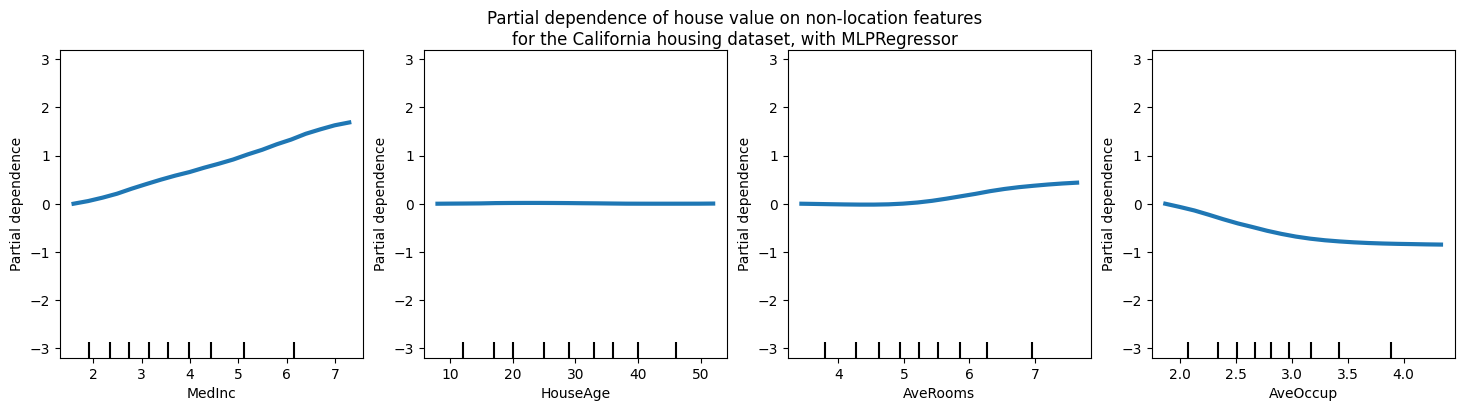

In [27]:
fig, ax = plt.subplots(1, 4, figsize=(18,4))

common_params = {
    "kind": "average",
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "centered": True,
    "random_state": None,
}

print("Computing partial dependence plots...")
start_tic = time()
display = PartialDependenceDisplay.from_estimator(
    est,
    X_train,
    features=["MedInc", "HouseAge", "AveRooms", "AveOccup"],
    **common_params, 
    ax=ax, 
    line_kw={"linewidth":3}
)

end_tic  = time()
print(f"Fitting done in {end_tic - start_tic:0.3f}s")

display.figure_.suptitle(
    "Partial dependence of house value on non-location features\n"
    "for the California housing dataset, with MLPRegressor"
)

display.figure_.subplots_adjust(wspace=None, hspace=0.3)

ax[0].set_ylim(-3.2,3.2)
ax[1].set_ylim(-3.2,3.2)
ax[2].set_ylim(-3.2,3.2)
ax[3].set_ylim(-3.2,3.2)

plt.show()

Computing partial dependence plots...
Fitting done in 1.765s


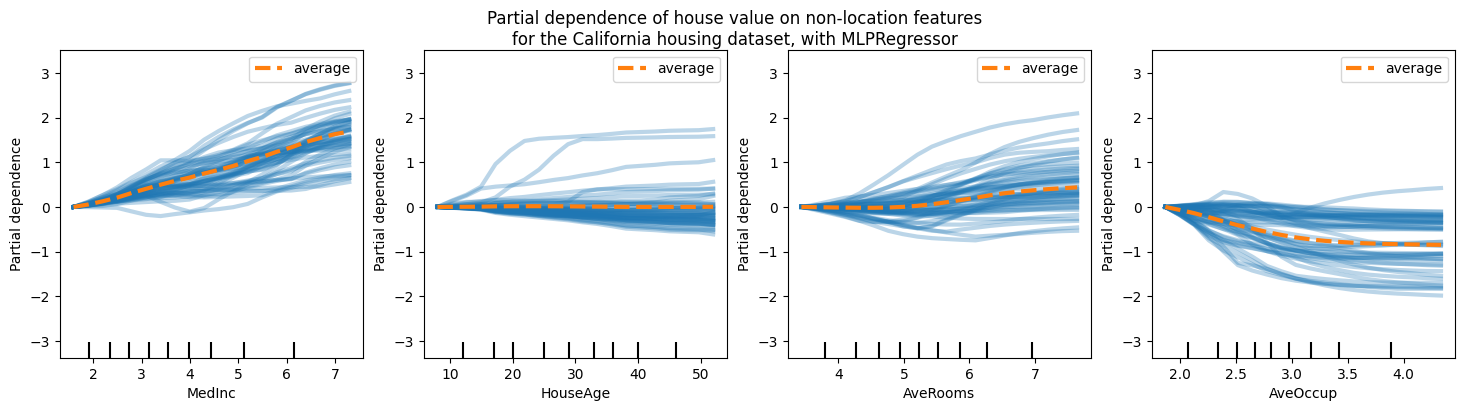

In [28]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(1, 4, figsize=(18,4))

common_params = {
    "kind": "both",
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "centered": True,
    "random_state": None,
}


print("Computing partial dependence plots...")
start_tic = time()
display = PartialDependenceDisplay.from_estimator(
    est,
    X_train,
    features=["MedInc", "HouseAge", "AveRooms", "AveOccup"],
    **common_params, 
    ax=ax, 
    line_kw={"linewidth":3}
)

end_tic  = time()
print(f"Fitting done in {end_tic - start_tic:0.3f}s")

display.figure_.suptitle(
    "Partial dependence of house value on non-location features\n"
    "for the California housing dataset, with MLPRegressor"
)

display.figure_.subplots_adjust(wspace=None, hspace=0.3)

plt.show()

### Model 2 : HistGradientBoostingRegressor

In [29]:
from sklearn.ensemble import HistGradientBoostingRegressor

print("Training HistGradientBoostingRegressor...")
tic = time()
est = HistGradientBoostingRegressor(random_state=0)
est.fit(X_train, y_train)
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {est.score(X_test, y_test):.2f}")

Training HistGradientBoostingRegressor...
done in 1.095s
Test R2 score: 0.85


Computing partial dependence plots...
done in 2.072s


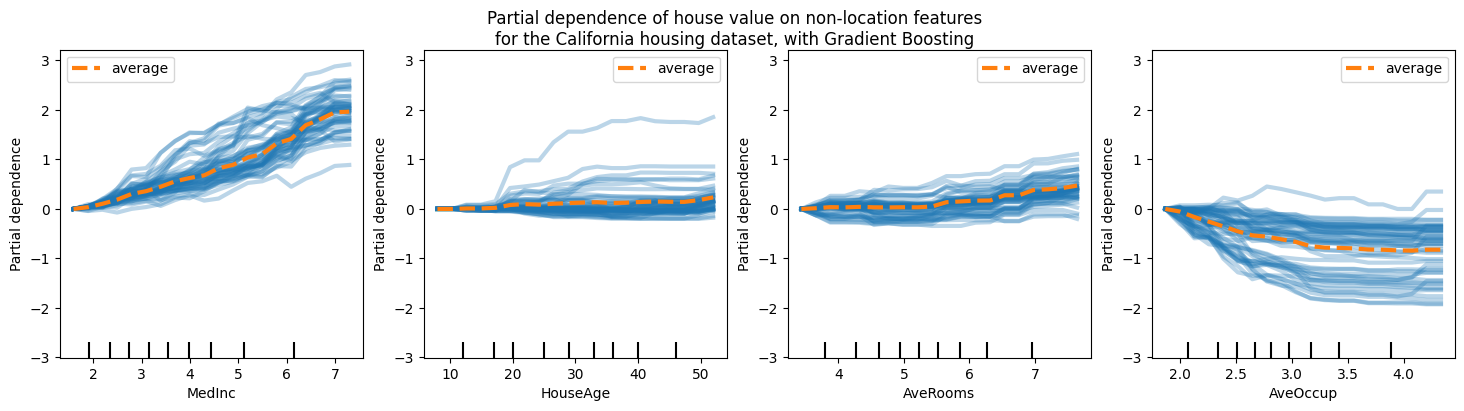

In [30]:
fig, ax = plt.subplots(1,4, figsize=(18,4))


print("Computing partial dependence plots...")
tic = time()
display = PartialDependenceDisplay.from_estimator(
    est,
    X_train,
    features=["MedInc",  "HouseAge", "AveRooms", "AveOccup"],
    **common_params,
    ax=ax,
    line_kw={"linewidth":3}
)
print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle(
    "Partial dependence of house value on non-location features\n"
    "for the California housing dataset, with Gradient Boosting"
)

display.figure_.subplots_adjust(wspace=None, hspace=0.3)

## Example 3 : IRIS Data

#### Classification

In [31]:
from sklearn.datasets import load_iris
iris = load_iris()

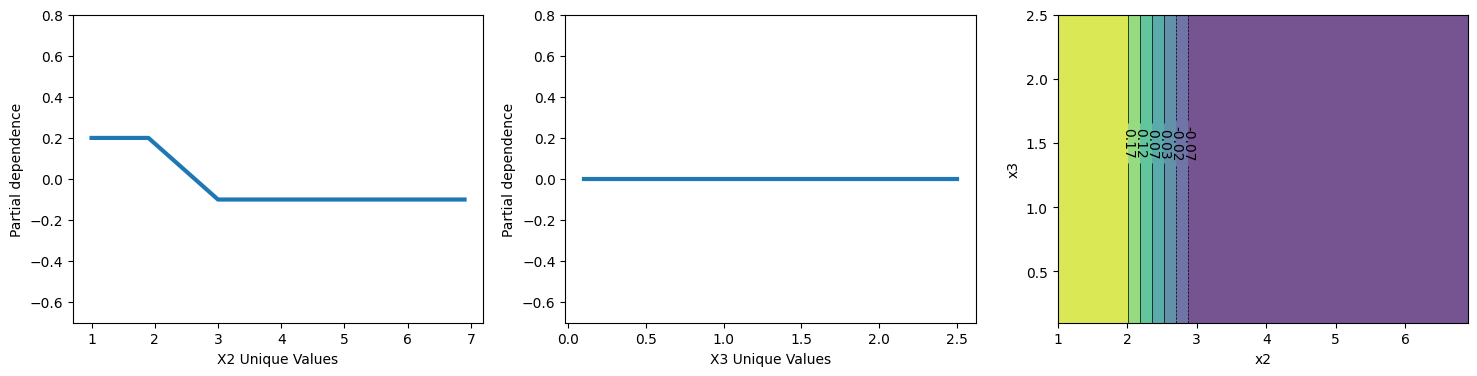

In [32]:
fig, ax = plt.subplots(1,3, figsize=(18,4))

clf = GradientBoostingClassifier(
    n_estimators=1,
    max_depth=1)

clf.fit(iris.data, iris.target)

features = [2, 3, (2,3)]

disp = PartialDependenceDisplay.from_estimator(
    clf, 
    iris.data, 
    features, 
    target=0,
    kind="average",
    ax=ax, 
    line_kw={"linewidth":3}
)

ax[0].set_xlabel('X2 Unique Values')
ax[1].set_xlabel('X3 Unique Values')

ax[0].set_ylim(-0.7,0.8)
ax[1].set_ylim(-0.7,0.8)

plt.setp(disp.deciles_vlines_, visible=False)

plt.show()

In [33]:
# (disp.deciles)
# (disp.deciles_hlines_), (disp.deciles_vlines_)

Check Manually

In [34]:
from sklearn.inspection import partial_dependence
results = partial_dependence(clf, iris.data, [3])

In [35]:
# averages for class=0, class=1, and class=2
# results["average"]

In [36]:
results["values"]

[array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,
        1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5])]

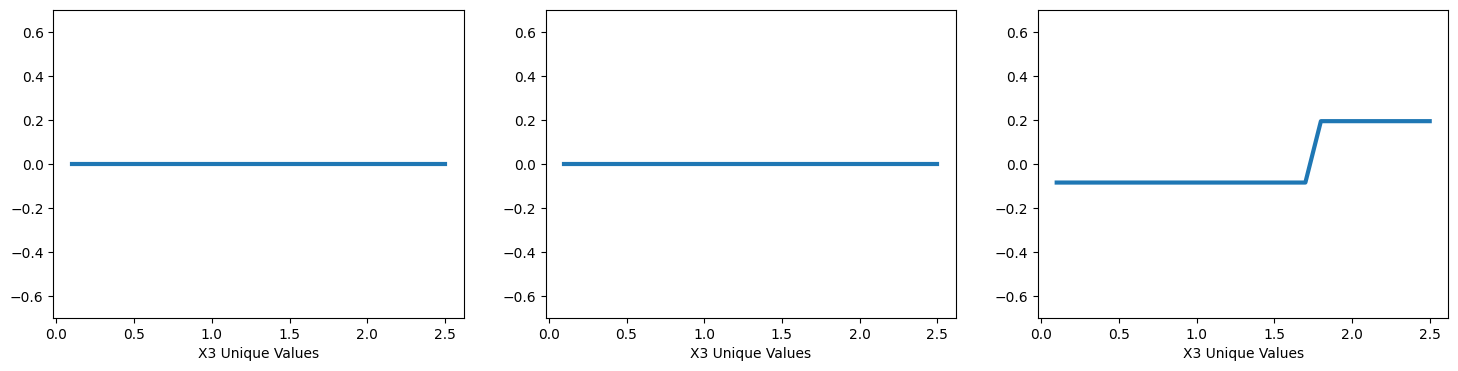

In [37]:
fig, ax = plt.subplots(1,3, figsize=(18,4))

ax[0].plot(results["values"][0], results["average"][0], linewidth=3)
ax[1].plot(results["values"][0], results["average"][1], linewidth=3)
ax[2].plot(results["values"][0], results["average"][2], linewidth=3)

ax[0].set_xlabel('X3 Unique Values')
ax[1].set_xlabel('X3 Unique Values')
ax[2].set_xlabel('X3 Unique Values')

ax[0].set_ylim(-0.7,0.7)
ax[1].set_ylim(-0.7,0.7)
ax[2].set_ylim(-0.7,0.7)

plt.show()